In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

id_list = test_df['PassengerId']


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def cabin_extract(data):
    data.Cabin = data.Cabin.fillna('X')
    data.Cabin = data.Cabin.apply(lambda x: str(x)[0])
    data.Cabin = data.Cabin.replace(['A', 'D', 'E', 'T'], 'M')
    data.Cabin = data['Cabin'].replace(['B', 'C'], 'H')
    data.Cabin = data['Cabin'].replace(['F', 'G'], 'L')
    data.Cabin = data.Cabin.map({"X":0, "L":1, "M":2, "H":3}).astype(int)
    return data

In [5]:
train_df = cabin_extract(train_df)
test_df = cabin_extract(test_df)

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


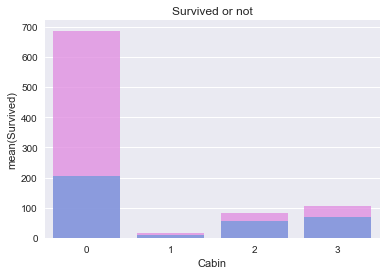

,Fare
Cabin,
0,19.157325
1,17.493135
2,49.281278
3,106.072642


In [7]:
ax = plt.axes()
data = train_df.groupby(['Cabin'])[['Survived']].count()
sns.barplot(x=data.index, y=data.Survived, alpha=0.8, color='violet', ax=ax)
data = train_df.groupby('Cabin')[['Survived']].sum()
sns.barplot(x=data.index, y=data.Survived, alpha=0.8, color='cornflowerblue', ax=ax)
ax.set_title('Survived or not');
sns.plt.show()

train_df.groupby('Cabin')[['Fare']].mean()

In [9]:
train_df = train_df.drop(["PassengerId","Name", "Ticket", 'Cabin'], axis=1);
test_df = test_df.drop(['PassengerId', 'Name', "Ticket", 'Cabin'], axis=1);

In [10]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [13]:
def feature_normalization(feature_vector):
    # scale to [-1, +1]
    max_value = max(feature_vector)
    min_value = min(feature_vector)
    mean_value = feature_vector.mean()
    return (feature_vector - mean_value) / (max_value - min_value)

def dummy(data, columns):
    for column in columns:
        if column not in data.columns:
            continue
        dummy_data = pd.get_dummies(data[column], drop_first=False)
        num = len(dummy_data.loc[0,:])
        #dummy_data.columns = [column+"_"+str(x+1) for x in range(num)]
        data = pd.concat([data, dummy_data], axis=1)
        data = data.drop(column, axis=1)
    return data


In [14]:
train_df = dummy(train_df, ['Sex', "Embarked", 'Pclass'])
test_df = dummy(test_df, ['Sex', 'Embarked', 'Pclass'])
train_df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [15]:
train_df.loc[train_df.Age.isnull()]

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
5,0,NaN,0,0,8.4583,0,1,0,1,0,0,0,1
17,1,NaN,0,0,13.0000,0,1,0,0,1,0,1,0
19,1,NaN,0,0,7.2250,1,0,1,0,0,0,0,1
26,0,NaN,0,0,7.2250,0,1,1,0,0,0,0,1
28,1,NaN,0,0,7.8792,1,0,0,1,0,0,0,1
29,0,NaN,0,0,7.8958,0,1,0,0,1,0,0,1
31,1,NaN,1,0,146.5208,1,0,1,0,0,1,0,0
32,1,NaN,0,0,7.7500,1,0,0,1,0,0,0,1
36,1,NaN,0,0,7.2292,0,1,1,0,0,0,0,1
42,0,NaN,0,0,7.8958,0,1,1,0,0,0,0,1


In [16]:
def fare(data):
    data.loc[data.Fare.isnull(), 'Fare'] = data['Fare'].mean()
    data.Fare.astype(int)
    return data

def age(data):
    most = data.Age.mode()[0]
    data.loc[data.Age.isnull(), 'Age'] = most
    data.Age.astype(int)
    return data

test_df = fare(test_df)
train_df = age(train_df)
test_df = age(test_df)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived    891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
female      891 non-null uint8
male        891 non-null uint8
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
1           891 non-null uint8
2           891 non-null uint8
3           891 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.8 KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
female    418 non-null uint8
male      418 non-null uint8
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
1         418 non-null uint8
2         418 non-null uint8
3         418 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 16.4 KB


In [19]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#model = LogisticRegression()
#model.fit(train_df.drop('Survived', axis=1), train_df.Survived)
#predictions = model.predict(test_df)

In [20]:
clf_ev = RandomForestClassifier()
x, y = data.drop('Survived'), data['Survived']
parameters = {'n_estimators':[100,300], 'max_features':[3,4,5,'auto'],'min_samples_leaf':[9,10,12], 'random_state':[7]}
grid_search = GridSearchCV(estimator=clf_ev, param_grid=parameters, cv=10, scoring='accuracy')
grid_search.fit(x, y)
print("best score: {}".format(grid_search.best_score_))
bsp = grid_search.best_estimator

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
data_d = {"PassengerId":id_list, "Survived":predictions}
output = pd.DataFrame(data_d)
output.to_csv("predictions.csv", index=False)